In [1]:
#Dataset - Udemy Courses Dataset on Kaggle
#https://www.kaggle.com/datasets/sonalisingh1411/udemy-courses-dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [207]:
data = pd.read_csv("Udemy Courses Data.csv")
data.head()

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


### Top 5 courses with the most subscribers on Udemy

In [6]:
data.sort_values(by="num_subscribers", ascending=False).head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
2230,41295,Learn HTML5 Programming From Scratch,False,Free,268923,8629,45,All Levels,10.5 hours,2013-02-14T07:03:41Z,Web Development
776,59014,Coding for Entrepreneurs Basic,False,Free,161029,279,27,Beginner Level,3.5 hours,2013-06-09T15:51:55Z,Web Development
3385,625204,The Web Developer Bootcamp,True,200,121584,27445,342,All Levels,43 hours,2015-11-02T21:13:27Z,Web Development
640,173548,Build Your First Website in 1 Week with HTML5 ...,False,Free,120291,5924,30,Beginner Level,3 hours,2014-04-08T16:21:30Z,Web Development
3316,764164,The Complete Web Developer Course 2.0,True,200,114512,22412,304,All Levels,30.5 hours,2016-03-08T22:28:36Z,Web Development


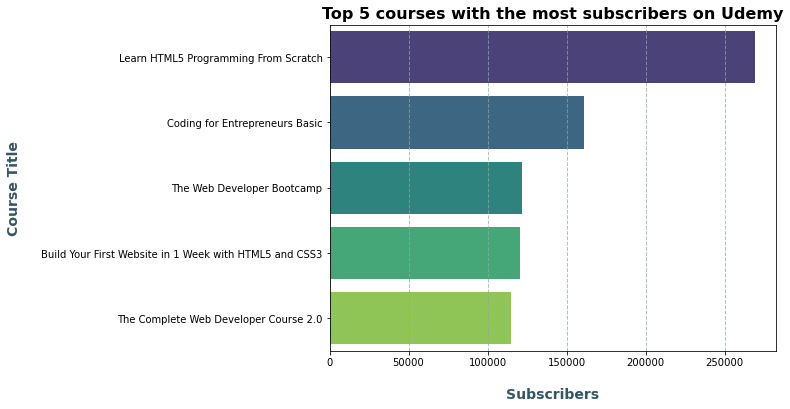

In [60]:
plt.figure(figsize = (8,6))
sns.barplot(x = "num_subscribers", 
            y= "course_title", 
            data=data.sort_values(by="num_subscribers", ascending=False).head(5), 
            palette="viridis")
plt.title("Top 5 courses with the most subscribers on Udemy",
          fontsize= 16,
          fontweight = "bold")
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.7)
plt.xlabel("Subscribers", weight="bold", 
           color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Course Title", weight="bold", 
           color="#355764", fontsize=14, labelpad=20)
plt.show()

### Which subject has the most number of courses? 

In [36]:
data["subject"].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     680
Graphic Design          603
Name: subject, dtype: int64

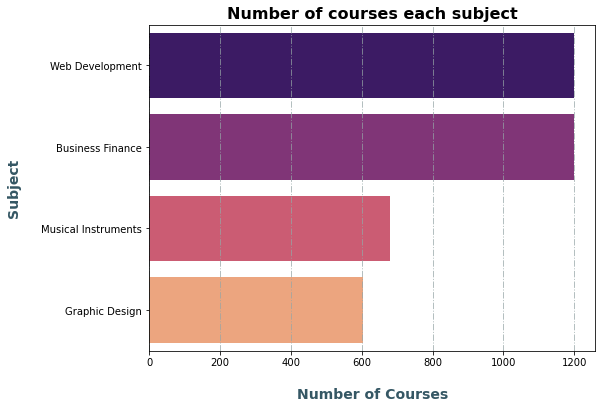

In [76]:
subjects = pd.DataFrame({'Subject': data["subject"].value_counts().index, 'Total Courses': data["subject"].value_counts().values})

plt.figure(figsize = (8,6))
sns.barplot(x = "Total Courses",
            y = "Subject",
            data=subjects,
            palette="magma")
plt.title("Number of courses each subject", fontsize= 16, fontweight = "bold")
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='x', alpha=0.7)
plt.xlabel("Number of Courses", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Subject", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.show()

### Subject based Average Subscribers

In [67]:
data.groupby("subject")["num_subscribers"].mean().sort_values(ascending=False)

subject
Web Development        6650.476667
Graphic Design         1763.097844
Business Finance       1560.256047
Musical Instruments    1245.130882
Name: num_subscribers, dtype: float64

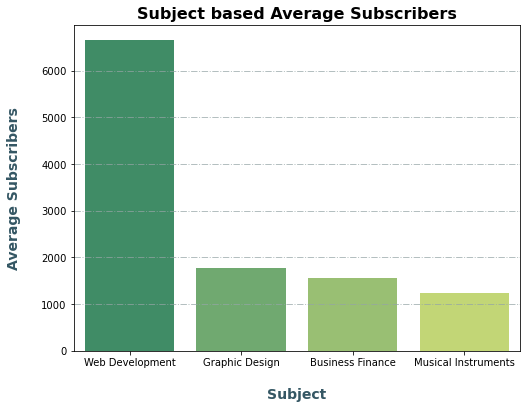

In [79]:
avg_subs = pd.DataFrame({'Subject': data.groupby("subject")["num_subscribers"].mean().sort_values(ascending=False).index,
                         'Average Subscribers': data.groupby("subject")["num_subscribers"].mean().sort_values(ascending=False).values})

plt.figure(figsize = (8,6))
sns.barplot(x = "Subject",
            y = "Average Subscribers",
            data=avg_subs,
            palette="summer")
plt.title("Subject based Average Subscribers", fontsize= 16, fontweight = "bold")
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
plt.xlabel("Subject", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Average Subscribers", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.show()

### All the courses which are free

In [84]:
free_courses = data[(data["is_paid"] == False)]
data[(data["is_paid"] == False)].head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
41,286070,5 lecciones que todo guitarrista debe tomar,False,Free,4452,263,14,Beginner Level,1 hour,2014-08-23T05:08:14Z,Musical Instruments
49,696630,"7 Ways A Beginner Guitarist Can Sound Better, ...",False,Free,4529,193,7,Beginner Level,36 mins,2015-12-21T18:50:50Z,Musical Instruments
57,955914,A beginner`s guide to fingerpicking and strumm...,False,Free,3481,29,20,Beginner Level,2 hours,2016-09-13T21:51:59Z,Musical Instruments
67,270976,A how to guide in HTML,False,Free,7318,205,8,Beginner Level,35 mins,2014-08-10T20:19:10Z,Web Development
74,1214144,¡Triunfar en La Bolsa de Valores No Requiere d...,False,Free,338,7,6,Beginner Level,1 hour,2017-05-30T14:30:12Z,Business Finance


In [86]:
print("Number of free courses: ",len(free_courses))

Number of free courses:  310


### Paid - Free Pie Chart

In [101]:
paid_courses = data[(data["is_paid"] == True)]

In [111]:
pie_data = dict()
pie_data = {'Number of free courses': len(free_courses),
            'Number of paid courses': len(paid_courses)}
pie_data

{'Number of free courses': 310, 'Number of paid courses': 3372}

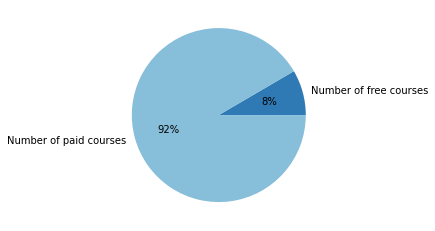

In [108]:
colors = sns.color_palette('RdBu_r')

plt.pie(pie_data.values(), labels= pie_data.keys(), colors = colors, autopct='%.0f%%')
plt.show()

### Subject based Average Price

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3682 entries, 0 to 3681
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3682 non-null   int64 
 1   course_title         3682 non-null   object
 2   is_paid              3682 non-null   bool  
 3   price                3682 non-null   object
 4   num_subscribers      3682 non-null   int64 
 5   num_reviews          3682 non-null   int64 
 6   num_lectures         3682 non-null   int64 
 7   level                3682 non-null   object
 8   content_duration     3682 non-null   object
 9   published_timestamp  3682 non-null   object
 10  subject              3682 non-null   object
dtypes: bool(1), int64(4), object(6)
memory usage: 291.4+ KB


In [226]:
# price dtype = object
# we need to convert float64
data["price"] = np.where(data['price']=="Free", np.nan, data["price"])
data['price'] = data['price'].astype('float64')
data.head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments
2,1193886,#12 Hand Coordination: Let your Hands dance wi...,True,75.0,482,1,47,Intermediate Level,1.5 hours,2017-04-26T18:34:57Z,Musical Instruments
3,1116700,#4 Piano Hand Coordination: Fun Piano Runs in ...,True,75.0,850,3,43,Intermediate Level,1 hour,2017-02-21T23:48:18Z,Musical Instruments
4,1120410,#5 Piano Hand Coordination: Piano Runs in 2 ...,True,75.0,940,3,32,Intermediate Level,37 mins,2017-02-21T23:44:49Z,Musical Instruments


In [130]:
data.groupby("subject")["price"].mean().sort_values(ascending=False)

subject
Web Development        86.635426
Business Finance       74.378966
Graphic Design         61.390845
Musical Instruments    53.154574
Name: price, dtype: float64

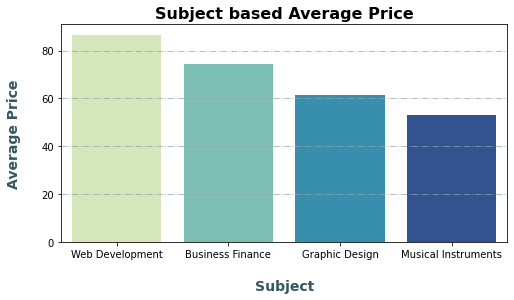

In [133]:
avg_price = pd.DataFrame({'Subject': data.groupby("subject")["price"].mean().sort_values(ascending=False).index,
                         'Average Prices': data.groupby("subject")["price"].mean().sort_values(ascending=False).values})

plt.figure(figsize = (8,4))
sns.barplot(x = "Subject",
            y = "Average Prices",
            data=avg_price,
            palette="YlGnBu")
plt.title("Subject based Average Price", fontsize= 16, fontweight = "bold")
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
plt.xlabel("Subject", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Average Price", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.show()

### Correlation between 'Subscribers' and 'Price'

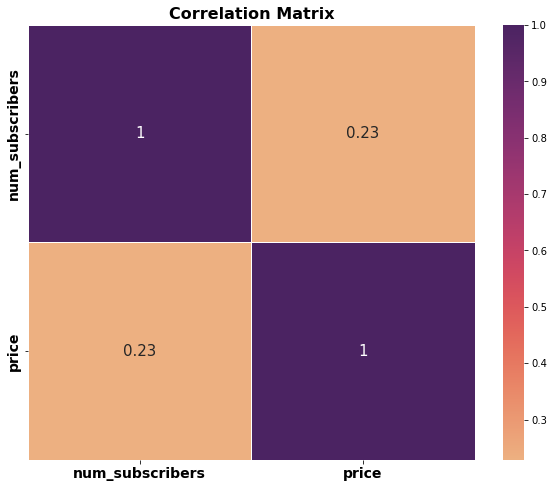

We can say weak relationship or no relationship between subscribers and price


In [154]:
plt.figure(figsize=(10,8))
plt.xticks(fontsize=14, weight="bold")
plt.yticks(rotation = 90, fontsize=14, weight="bold")
sns.heatmap(data[["num_subscribers","price"]].corr(),
            cmap = "flare",
            annot = True, linewidths=0.8, 
            annot_kws={'size': 15}, linecolor='white')
plt.title("Correlation Matrix", weight="bold",fontsize=16)
plt.show()

print("We can say weak relationship or no relationship between subscribers and price")

### Which year has the most number of courses?

In [156]:
data["Published_Date"] = pd.to_datetime(data.published_timestamp)

In [157]:
data.head(2)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,Published_Date
0,288942,#1 Piano Hand Coordination: Play 10th Ballad i...,True,35.0,3137,18,68,All Levels,1.5 hours,2014-09-18T05:07:05Z,Musical Instruments,2014-09-18 05:07:05+00:00
1,1170074,#10 Hand Coordination - Transfer Chord Ballad ...,True,75.0,1593,1,41,Intermediate Level,1 hour,2017-04-12T19:06:34Z,Musical Instruments,2017-04-12 19:06:34+00:00


In [158]:
data["Published_Date"].dt.year.value_counts()

2016    1206
2015    1014
2017     719
2014     491
2013     202
2012      45
2011       5
Name: Published_Date, dtype: int64

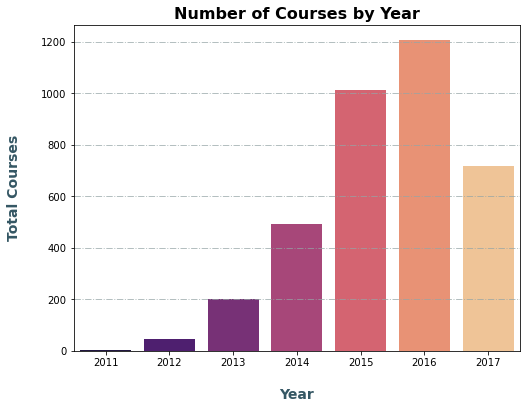

In [168]:
courses_year = data["Published_Date"].dt.year.value_counts()

plt.figure(figsize = (8,6))
sns.barplot(x = courses_year.keys(), y= courses_year, palette="magma")
plt.title("Number of Courses by Year", fontsize= 16, fontweight = "bold")
plt.grid(color='#95a5a6', linestyle='-.', linewidth=1, axis='y', alpha=0.7)
plt.xlabel("Year", weight="bold", color="#355764", fontsize=14, labelpad = 20)
plt.ylabel("Total Courses", weight="bold", color="#355764", fontsize=14, labelpad=20)
plt.show()

### What is the average reviews of subjects with Graphic Design?

In [216]:
data[(data["subject"] == "Graphic Design")].head(5)

,course_id,course_title,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
8,206592,:::Beginners Guide To Creating Amazing Images ...,True,25,72,5,17,Beginner Level,1 hour,2014-04-29T19:50:31Z,Graphic Design
20,1165268,15 Motion Graphic Elements in After Effect (S...,True,30,8,0,20,Intermediate Level,3 hours,2017-04-11T04:27:34Z,Graphic Design
35,1164876,3DS MAX - Learn 3Ds MAX tutorial for Beginners...,True,20,785,2,29,All Levels,4.5 hours,2017-04-18T16:45:59Z,Graphic Design
39,599652,48 Logo Designs and Techniques,True,20,113,9,48,All Levels,9 hours,2015-09-15T00:23:14Z,Graphic Design
47,1269190,7 Secrets To Designing In Black and White,True,100,1000,1,12,All Levels,1.5 hours,2017-06-27T19:55:18Z,Graphic Design


In [217]:
graphic_design = data[(data["subject"] == "Graphic Design")]
graphic_design["num_reviews"].mean()

61.475953565505804

### Outliner Detection

In [268]:
def outliner_detection(dataset,columns):
    for column in columns:
        # first quartile, third quartile
        Q1 = dataset[column].quantile(0.25)
        Q3 = dataset[column].quantile(0.75)
    
        #median
        med = dataset[column].median()
        
        #IQR
        IQR = Q3-Q1
        
        #bound values
        min_bound = Q1-(1.5*IQR)
        max_bound = Q3+(1.5*IQR)

        outliners = (dataset[column] < min_bound).sum() + (dataset[column] > max_bound).sum()
        
        if outliners > 0:
            plt.figure(figsize=(7, 7))
            sns.boxplot(dataset[column], palette="Blues")
            plt.title("{} Boxplot".format(column), fontsize= 16, fontweight = "bold")
            plt.xlabel("{}".format(column), weight="bold", color="#355764", fontsize=14, labelpad=20)
            plt.xticks(fontsize=10, weight="bold")
            plt.yticks(fontsize=10, weight="bold")
            plt.show()
            print(f"{column} : Total outliner values are {outliners}.")
            
        
        else:
            print(f"{column} : Outlier value doesn't found.")
        

price : Outlier value doesn't found.


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


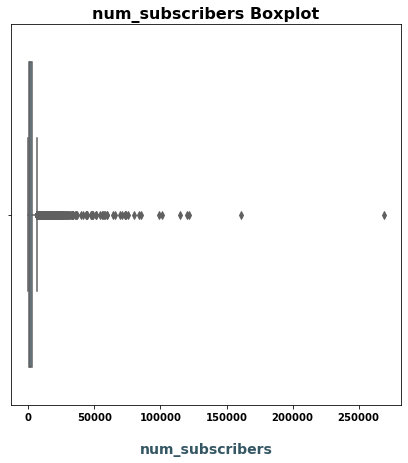

num_subscribers : Total outliner values are 433.


In [269]:
# price, num_subscribers 
outliner_detection(data,columns = ["price", "num_subscribers"])

C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


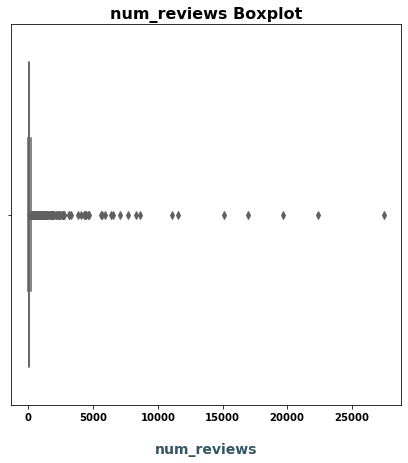

num_reviews : Total outliner values are 494.


C:\Users\pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


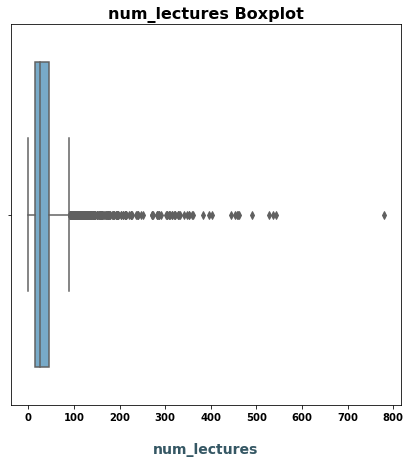

num_lectures : Total outliner values are 300.


In [270]:
# num_reviews, num_lectures 
outliner_detection(data,columns = ["num_reviews", "num_lectures"])